'''
% % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % %
% Universidade Federal do Paraná - UFPR
% TE342 Fundamentos de Comunicação %
% Elaborado por Luis Lolis% 
% Passagem para o Python, síntese e compilação por Anderson L. Luiz
% % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % %
'''

**Terceira atividade de laboratório - modulação Angular**

O objetivo desta atividade é o processo de fixação de conceitos relacionados a modulação FM estudada.
Neste laboratório, você terá alguns recursos para formação de gráficos em python com diferentes tipos de modulação.
As modulações presentes são **PM** e **FM**.
Você deve mudar os sinais modulantes da modulação angular e observar, considerar e explicar os efeitos no sinal resultante. 

A sua análise deve contemplar os fenômenos no domínio do tempo e no domínio da frequência. (Inclua os gráficos mostrando estas mudanças no seu relatório.)

Você irá formar um pequeno relatório respondendo as perguntas dos grupos a 
seguir (comente e faça conclusões sobre o que você notou):


Exercício 1 - explique a diferença entre os sinais PM e FM para os casos a seguir:

a) Aplique o sinal modulante **seno** para os dois tipos de modulação;

b) Aplique o sinal modulante **constante** para os dois tipos de modulação;

c) Aplique o sinal modulante **rampa** para o a modulação PM e um sinal modulante **constante** para a modulação FM.

Exercício 2 - Considere um sinal modulante senoidal com amplitude 2 V, frequência 20 Hz e indíces de modulação igual a 0,1, 1, 2 e 3:

a) Qual a diferença do sinal FM com índice de modulação 0.1 aos demais?

b) O que muda em relação a posição das frequências laterais alterando o
índice de modulação?

c) O que muda em relação a amplitude das frequências em torno da portadora, múltiplos da frequência do sinal modulando, ou seja, as frequências laterais alterando o indíce de modulação?

d) Qual a a banda ocupada por 90 % de potência do sinal FM. Considere $\beta$ =3? Aplicar a tabela das funções de Bessel. 


*************************

1ª Obs.: A entrega é um Notebook com as alterações, os gráficos e os comentários.


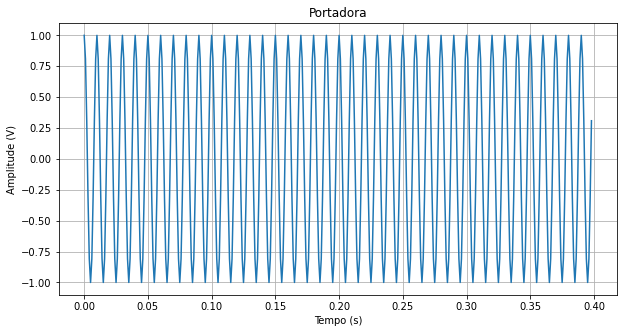

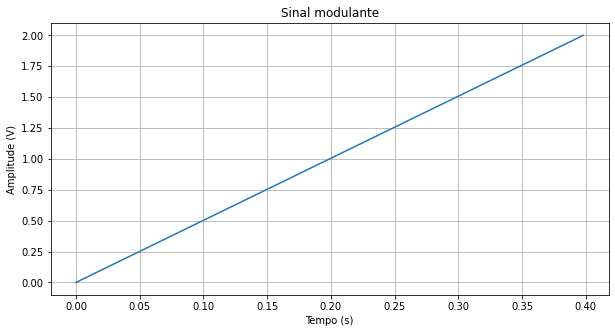

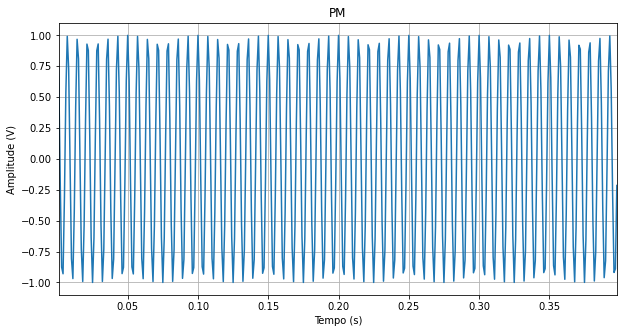

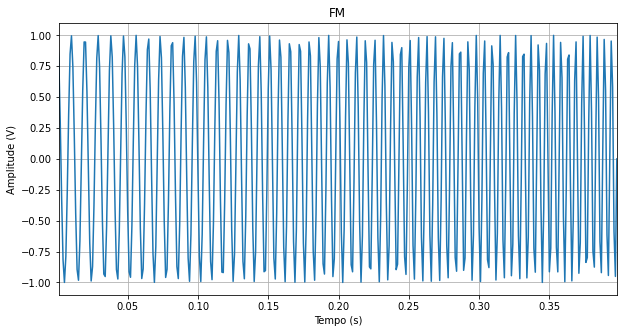

In [36]:
# Bibliotecas
import os
from numpy import *
from matplotlib.pyplot import *
from scipy import signal
import scipy
from scipy.signal import lfilter, windows

# Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 10  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 1 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
#m = ones(length(t),1)
#m = linspace(0, 10, len(t))/5

kp = 5  # sensibilidade a fase
kf = 50  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

# --------------------------------------
# Exemplo de plot de sinais no tempo e na frequência.
# --------------------------------------

# Declarando alguns parâmetros:

# Pode-se utilizar o comando "n.welch".
# Declarando alguns parâmetros:

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

# OBS.: O entendimento profundo do uso e funcionamento das funções acima não é fundamental para o entendimento do exercício. 





rcParams['figure.figsize'] = [10, 5]
figure(1)
plot(t, c)
title('Portadora')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(2)
plot(t, m)
title('Sinal modulante')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(3)
plot(t, y_pm)
title('Sinal modulado PM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('PM')
grid()


figure(4)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()


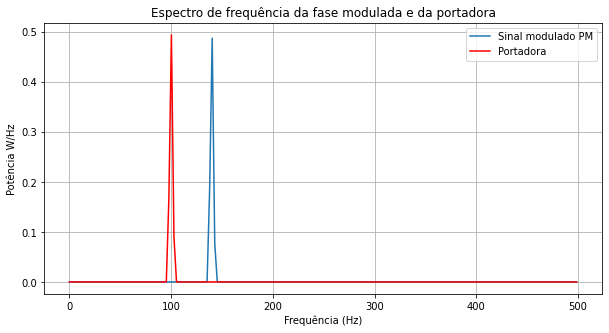

In [37]:
# Espectro do sinal modulado PM

figure(4)
[f1, p1] = signal.welch(y_pm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'r')
title('Espectro de frequência da fase modulada e da portadora')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado PM', 'Portadora'])
grid()




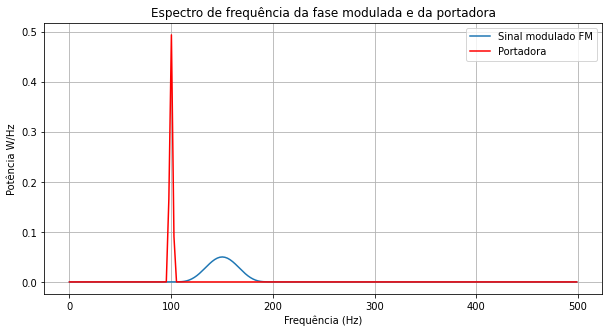

In [38]:
# Espectro do sinal modulado FM

figure(4)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'r')
title('Espectro de frequência da fase modulada e da portadora')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()

